<figure align="left">
  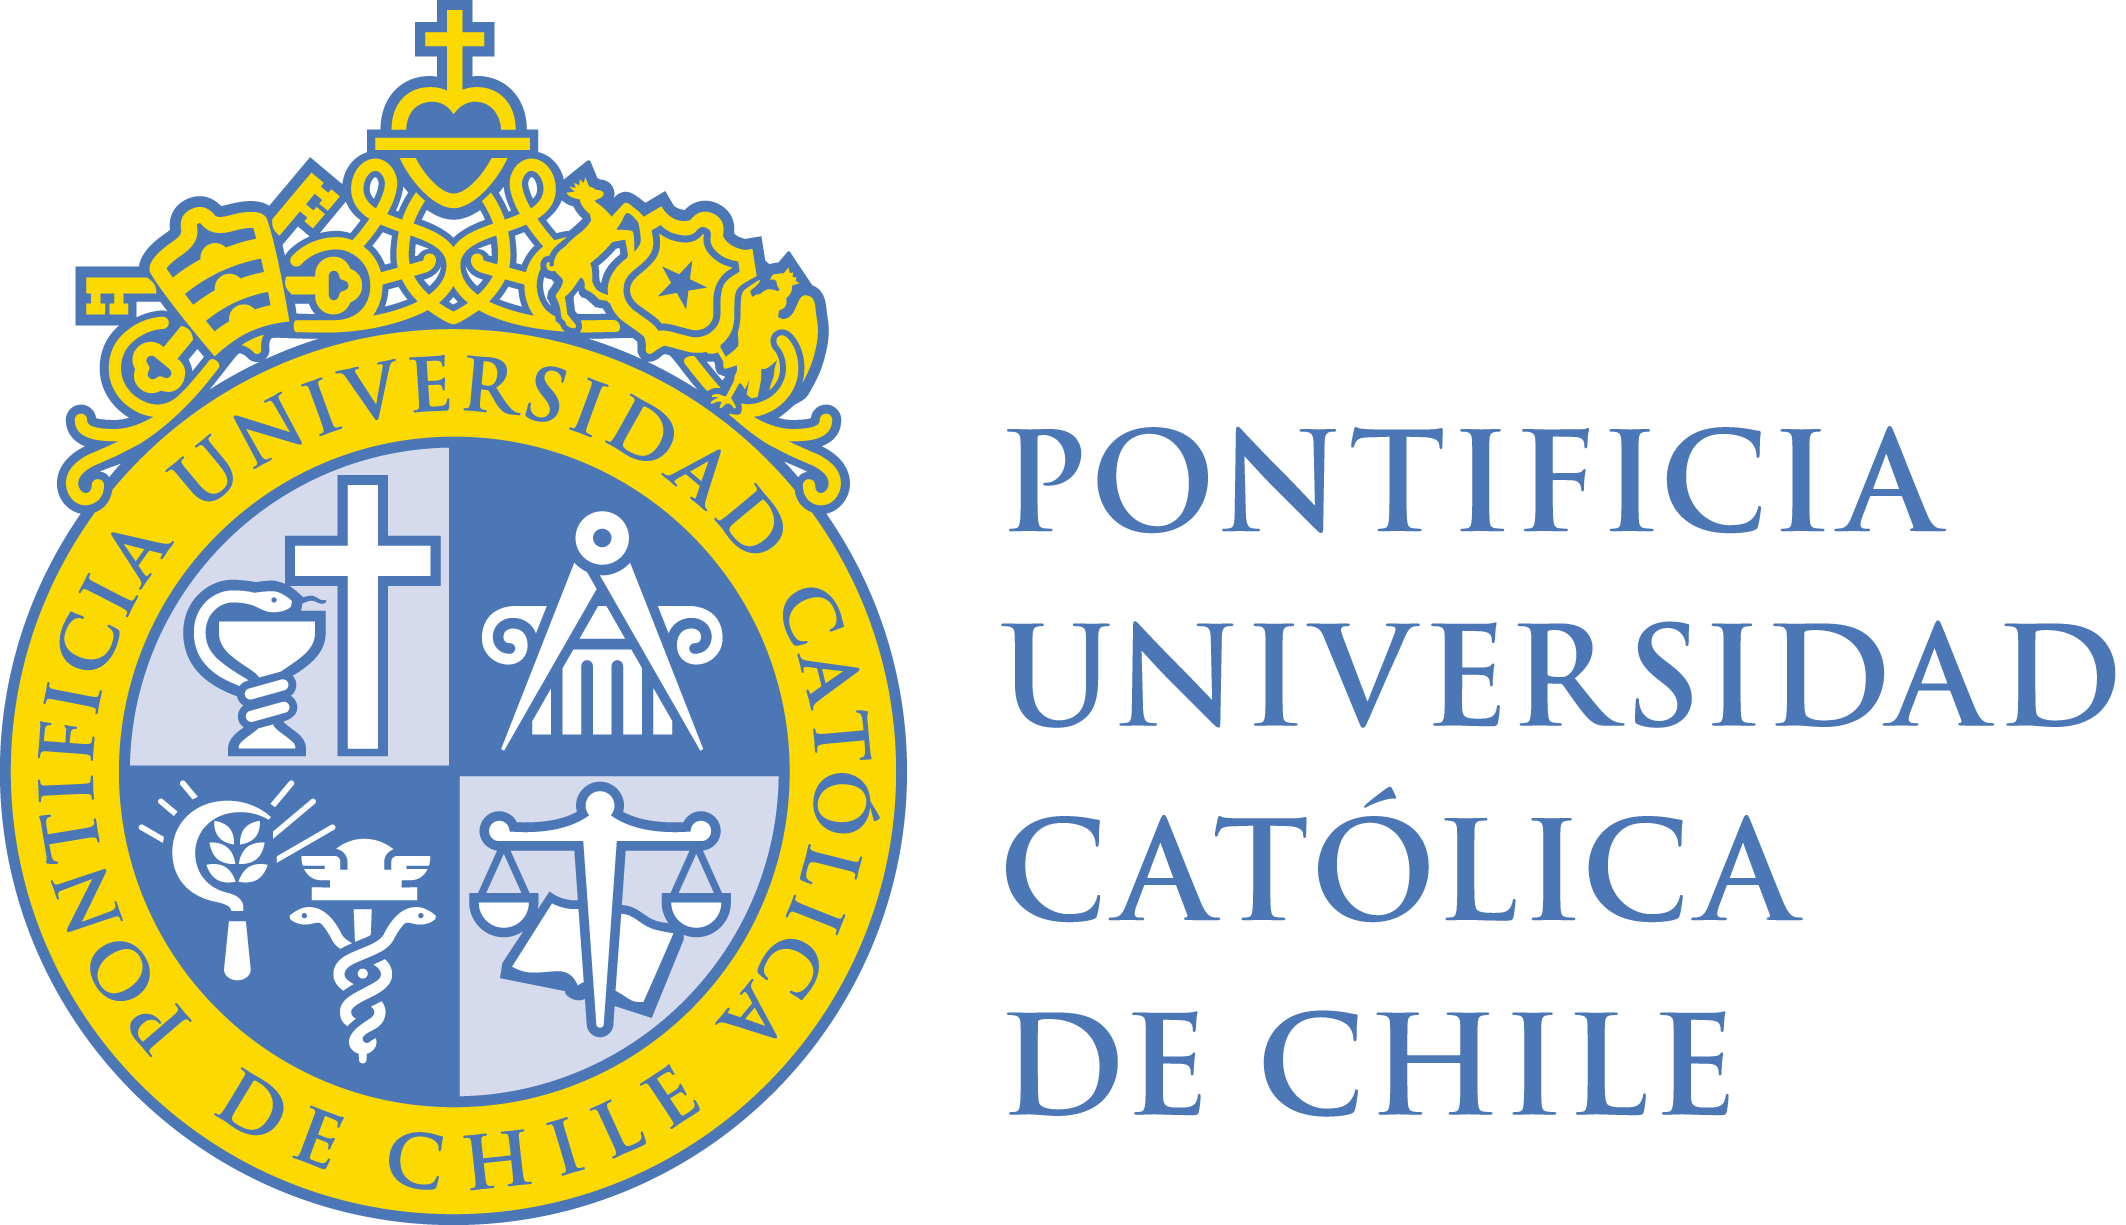
</figure>

## Magíster en Ciencia de Datos
### Curso: Procesamiento de Datos Masivos - Tarea 3

### Integrantes:
1. **David Quezada**
2. **Carlos Ramírez**



In [41]:
pip install efficient-apriori


Note: you may need to restart the kernel to use updated packages.


In [42]:
import csv
import numpy as np
from efficient_apriori import apriori

archivo_csv = 'canastas_tarea_3.csv'
with open(archivo_csv, 'r', newline='', encoding='utf-8') as csvfile:
    lector_csv = csv.reader(csvfile)
    datos = [tuple(fila) for fila in lector_csv]


1.	Impresión de las 10 reglas de asociación más relevantes: Escribe un programa que imprima en pantalla las 10 reglas de asociación con mayor soporte, siempre y cuando tengan una confianza mayor a 0.1

In [43]:
# Algoritmo Apriori
#itemsets, rules = apriori(datos, min_support=0.03, min_confidence=0.1)

for min_support_temp in np.arange(1,0,-0.005):
    itemsets, rules = apriori(datos, min_support=min_support_temp, min_confidence=0.1)
    if len(rules) >= 20:
        break


# Obtener las 10 reglas de asociación más relevantes
reglas_relevantes = sorted(rules, key=lambda x: (x.support, x.confidence), reverse=True)[:10]
reglas_relevantes

[{vinagre} -> {sal},
 {sal} -> {vinagre},
 {papayas} -> {maíz},
 {maíz} -> {papayas},
 {zanahorias} -> {plátanos},
 {plátanos} -> {zanahorias},
 {laurel} -> {vinagre},
 {vinagre} -> {laurel},
 {coliflor} -> {sal},
 {sal} -> {coliflor}]

In [44]:
print("{:<40} {:<15} {:<15}".format("Regla", "Soporte", "Confianza"))
print("-" * 70)

for rule in reglas_relevantes:
    lhs = ', '.join(map(str, rule.lhs))
    rhs = ', '.join(map(str, rule.rhs))
    print("{:<41} {:<16} {:<15}".format(f"{lhs} => {rhs}", round(rule.support, 4), round(rule.confidence, 4)))
print("-" * 70)

Regla                                    Soporte         Confianza      
----------------------------------------------------------------------
vinagre => sal                            0.0461           0.3835         
sal => vinagre                            0.0461           0.3805         
papayas => maíz                           0.0442           0.4496         
maíz => papayas                           0.0442           0.3836         
zanahorias => plátanos                    0.0435           0.4615         
plátanos => zanahorias                    0.0435           0.3529         
laurel => vinagre                         0.0374           0.4586         
vinagre => laurel                         0.0374           0.3112         
coliflor => sal                           0.0365           0.3032         
sal => coliflor                           0.0365           0.3008         
----------------------------------------------------------------------


Basándonos en los resultados previos, se destaca que diversas reglas relevantes comparten un soporte similar y se repiten en sentido inverso. Para simplificar la presentación de los resultados posteriores, adoptaremos la siguiente notación:

$$ (A \Rightarrow B \land B \Rightarrow A) = (A \Leftrightarrow B) $$

Dada la similitud en el soporte de las reglas en sentido inverso, las consideraremos equivalentes. Con el objetivo de evitar repeticiones y seleccionar las 10 reglas más relevantes efectivamente, omitimos las reglas inversas en nuestro análisis.

In [45]:
#para obtener las 10 reglas de asociación más relevantes obviando el sentido inverso debido a la equivalencia de soporte
reglas_relevantes = sorted(rules, key=lambda x: (x.support, x.confidence), reverse=True)[:20]

print("{:<46}  {:<15} {:<17} {:<15}".format("Regla", "Confianza =>", "Confianza <=", "Soporte"))
print("-" * 100)

for i in range(0, 20, 2):
    regla_1, regla_2 = reglas_relevantes[i], reglas_relevantes[i + 1]

    lhs_1 = ', '.join(map(str, regla_1.lhs))
    rhs_1 = ', '.join(map(str, regla_1.rhs))
    confianza_1 = round(regla_1.confidence, 4)

    lhs_2 = ', '.join(map(str, regla_2.lhs))
    rhs_2 = ', '.join(map(str, regla_2.rhs))
    confianza_2 = round(regla_2.confidence, 4)


    print("{:<50} {:<15} {:<15} {:<15}".format(f"{lhs_1} <=> {rhs_1}", confianza_1, confianza_2, round(regla_1.support, 4)))
print("-" * 100)


Regla                                           Confianza =>    Confianza <=      Soporte        
----------------------------------------------------------------------------------------------------
vinagre <=> sal                                    0.3835          0.3805          0.0461         
papayas <=> maíz                                   0.4496          0.3836          0.0442         
zanahorias <=> plátanos                            0.4615          0.3529          0.0435         
laurel <=> vinagre                                 0.4586          0.3112          0.0374         
coliflor <=> sal                                   0.3032          0.3008          0.0365         
patatas <=> mantequilla                            0.4482          0.4362          0.0355         
frambuesas <=> tomillo                             0.3703          0.3568          0.0355         
rúcula <=> coliflor                                0.3208          0.2912          0.035          
huevos <=

2.	Cálculo del interés de las reglas: Define el interés de una regla I -> j como la diferencia (S – F) entre el soporte de la regla (S) y la proporción (F) de canastas que contienen j en relación al total de canastas. Escribe un programa que calcule el interés de las 10 reglas que se encontraron en el punto 1

In [46]:

print("{:<46}  {:<15} {:<15} ".format("Regla", "Interés =>", "Interés <="))
print("-" * 80)

for i in range(0, 20, 2):
    regla_1 = reglas_relevantes[i]
    regla_2 = reglas_relevantes[i + 1]

    lhs_1 = ', '.join(map(str, regla_1.lhs))
    rhs_1 = ', '.join(map(str, regla_1.rhs))

    lhs_2 = ', '.join(map(str, regla_2.lhs))
    rhs_2 = ', '.join(map(str, regla_2.rhs))

    # Calcular intereses
    interes_1 = round(regla_1.support - itemsets[1][regla_1.rhs] / len(datos), 4)
    interes_2 = round(regla_1.support - itemsets[1][regla_2.rhs] / len(datos), 4)



    print("{:<48} {:<15} {:<15} ".format(f"{lhs_1} <=> {rhs_1}", interes_1, interes_2))


print("-" * 80)


Regla                                           Interés =>      Interés <=      
--------------------------------------------------------------------------------
vinagre <=> sal                                  -0.0751         -0.0742         
papayas <=> maíz                                 -0.071          -0.0541         
zanahorias <=> plátanos                          -0.0797         -0.0507         
laurel <=> vinagre                               -0.0829         -0.0442         
coliflor <=> sal                                 -0.0848         -0.0838         
patatas <=> mantequilla                          -0.064          -0.0604         
frambuesas <=> tomillo                           -0.0459         -0.0437         
rúcula <=> coliflor                              -0.0853         -0.0742         
huevos <=> mantequilla                           -0.0647         -0.044          
tomillo <=> sal                                  -0.0867         -0.0469         
------------------

3.	Discusión: Imagina que el supermercado tiene un plan en el que solo puede tomar acción en base a dos reglas en particular. De las 10 reglas que se imprimieron, analiza y selecciona las dos reglas que consideres más beneficiosas para el supermercado. Explica las razones por las que crees que estas dos reglas pueden tener un mayor impacto y cómo podrían ayudar al supermercado en su estrategia de ventas o toma de decisiones.


# Respuesta:

Para seleccionar las dos reglas más beneficiosas para el supermercado, consideramos el soporte, la confianza y el interés de las reglas. las reglas que elegimos son:

### Regla 1: \( $\text{vinagre} \Leftrightarrow \text{sal}$ \)
**Las razones para su selección:**
   
   La regla $(\text{vinagre} \Leftrightarrow \text{sal})$ tiene un soporte significativo($0,0461$), indicando su frecuencia en las transacciones de los clientes. La alta confianza en ambas direcciones(0.3835) indica una relación fuerte entre vinagre y sal. El interés negativo indica que la regla no es excepcional, indicando cierta redundancia, es decir, que hay muchas canastas donde solo hay vinagre o sal.  Aunque no por esto se puede descartar su utilidad de la regla, pues la alta confianza puede compensar este aspecto.

### Regla 2: \( $\text{papayas} \Leftrightarrow \text{maíz}$ \)

   **Las razones para su selección:**

   La regla $(\text{papayas} \Leftrightarrow \text{maíz})$ tiene un soporte significativo(0.0442) y una alta confianza en ambas direcciones(0.4496 y 0.3836) con una inclinación a la regla $(\text{papayas} \Rightarrow \text{maíz})$. Si bien el interés es negativo, la alta confianza hace que la regla sea valiosa con un argumento similar al de la regla 1.

Estas reglas sirven para definir estrategias basadas en ellas, tales como disposición de productos en el supermercado, promociones cruzadas, inventario, logística, planificación y toma de decisiones en estrategias de ventas.
